# The Environment & Task

## Introduction
This tutorial uses [Farama's Minigrid](https://github.com/Farama-Foundation/MiniGrid) library and grid-world environments, which are a great starting point for research on reinforcement learning (and have a nice, lightweight and fast API). The library follow the [Gymnasium API](https://github.com/Farama-Foundation/Gymnasium) which is also a handy tool for researchers in the field. 

MiniGrid may seem too simple but is a powerful tool used in real research. See some recent publications using it [here](https://minigrid.farama.org/content/publications/).

## Notebook Objectives
- Check that all dependencies are installed.
- Create and render a predefined Minigrid environment.
- Learn the environment's key concepts and configuration components that will be used throughout the tutorial.
- Run and visualize a random-action agent interacting with the world.

### Check Install

In [1]:
from helpers.check_dev_env import check_install
check_install()

All required packages are installed.


In [1]:
from confs.instances import env_config
from helpers import env_utils
from agents.random import RandomAgent

from os import path
import numpy as np
from minigrid.core.constants import IDX_TO_OBJECT
import matplotlib.pylab as plt

### State and Observations
- configuration details in `confs.instances.env_config`

Entities in grid:
 {1: 'empty', 2: 'wall', 4: 'door', 8: 'goal', 10: 'agent'} 

Grid-world state:
 [[ 2  2  2  2  2  2  2]
 [ 2 10  1  2  1  1  2]
 [ 2  1  1  2  1  1  2]
 [ 2  1  1  2  1  1  2]
 [ 2  1  1  4  1  1  2]
 [ 2  1  1  2  1  1  2]
 [ 2  1  1  2  1  1  2]
 [ 2  1  1  2  1  8  2]
 [ 2  2  2  2  2  2  2]] 

Grid-world egocentric observation,
Althrough not shown the agent is in (row,col) == (5,3):
 [[2 1 1 2 0]
 [4 1 1 2 0]
 [2 1 1 2 0]
 [2 1 1 2 0]
 [2 1 1 2 0]] 

Grid-world state and observation rendered as an image:


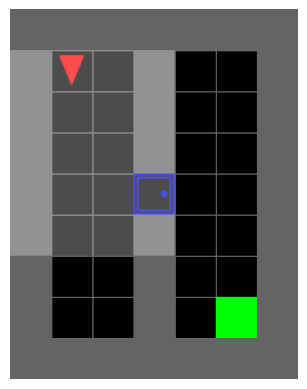

In [ ]:
env = env_utils.load_env(env_config)

observation, info = env.reset()

env_as_array = env.get_array_repr()
entities_in_grid = {key:value for key,value in IDX_TO_OBJECT.items() if np.isin(key, env_as_array)}

print('Entities in grid:\n',entities_in_grid,'\n')

print('Grid-world state:\n',env_as_array, '\n')

print('Grid-world egocentric observation,\nAlthrough not shown the agent is in (row,col) == (5,3):\n', observation['observation'].T, '\n')

print('Note that the value 0 in the egocentric observation matrix corresponds to unobserved cells.\n')

print('Grid-world state and observation rendered as an image:')
env.show_render()


### Actions

Valid actions:
['left', 'right', 'forward'] 

Grid-world after action:
 [[ 2  2  2  2  2  2  2]
 [ 2 10  1  2  1  1  2]
 [ 2  1  1  2  1  1  2]
 [ 2  1  1  2  1  1  2]
 [ 2  1  1  4  1  1  2]
 [ 2  1  1  2  1  1  2]
 [ 2  1  1  2  1  1  2]
 [ 2  1  1  2  1  8  2]
 [ 2  2  2  2  2  2  2]] 



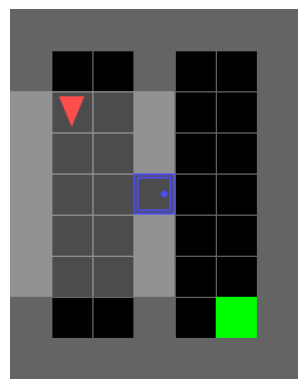

In [3]:
print('Valid actions:\n{}'.format([a.name for a in env.valid_actions]), '\n')

# instantiate a random action agent
random_action_agent = RandomAgent(valid_actions=env.valid_actions)

# take an action and render result
action = random_action_agent.act()
env.step(action)

print('Grid-world after action:\n',env_as_array, '\n')

env.show_render()

### Example Run
- Standard RL loop
- We will use a random action agent
- We will record a video and play it

In [4]:
from gymnasium.wrappers import RecordVideo

video_path = 'videos/00-environment/'

run_env = RecordVideo(env, 
					  video_folder=video_path, 
					  name_prefix='random-action', disable_logger=True,
                  	  episode_trigger=lambda x: True) # episode trigger set to record always

# generate a new env
observation, info = run_env.reset()

# simulate multiple steps
max_steps = 100
for t in range(max_steps):
	# robot observes and takes an action
	action = random_action_agent.act(observation)
	# step environment with action and receive new observations
	next_obs, reward, terminated, truncated, info = run_env.step(action=action)
	done = terminated or truncated
	if done:
			break
run_env.close()

In [5]:
video_full_path = path.join(video_path,'random-action-episode-0.mp4')
# if for some reason the video doesn't load check in your directory
print(video_full_path)

from IPython.display import Video
Video(video_full_path)

videos/00-environment/random-action-episode-0.mp4
